In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flicker8k/data/captions.txt
/kaggle/input/flicker8k/data/Images/3226254560_2f8ac147ea.jpg
/kaggle/input/flicker8k/data/Images/214543992_ce6c0d9f9b.jpg
/kaggle/input/flicker8k/data/Images/2366643786_9c9a830db8.jpg
/kaggle/input/flicker8k/data/Images/3368819708_0bfa0808f8.jpg
/kaggle/input/flicker8k/data/Images/2190227737_6e0bde2623.jpg
/kaggle/input/flicker8k/data/Images/2752809449_632cd991b3.jpg
/kaggle/input/flicker8k/data/Images/3097776588_312932e438.jpg
/kaggle/input/flicker8k/data/Images/1206506157_c7956accd5.jpg
/kaggle/input/flicker8k/data/Images/1319634306_816f21677f.jpg
/kaggle/input/flicker8k/data/Images/2465218087_fca77998c6.jpg
/kaggle/input/flicker8k/data/Images/3351493005_6e5030f596.jpg
/kaggle/input/flicker8k/data/Images/2949337912_beba55698b.jpg
/kaggle/input/flicker8k/data/Images/534886684_a6c9f40fa1.jpg
/kaggle/input/flicker8k/data/Images/3543600125_223747ef4c.jpg
/kaggle/input/flicker8k/data/Images/2174206711_11cb712a8d.jpg
/kaggle/input/flicker8k/data/I

In [2]:
path_img="/kaggle/input/flicker8k/data/Images/"
path_cap="/kaggle/input/flicker8k/data/captions.txt"

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.layers import *

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
df=pd.read_csv(path_cap)
df.head()

image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

In [5]:
import time

i=0
k=1
info={}
img_name=[]
try:
    while True:
        info[df.iloc[i,0]] = ["<start> "+df.iloc[i,1]+" <end>", 
                              "<start> "+df.iloc[i+1,1]+" <end>",
                              "<start> "+df.iloc[i+2,1]+" <end>",
                              "<start> "+df.iloc[i+3,1]+" <end>",
                              "<start> "+df.iloc[i+4,1]+" <end>"]
        img_name.append(df.iloc[i,0])
        i=i+5
        k+=1
        
        if k == 1501:
            break
except:
    print("The data has been processed")

In [6]:
len(info)

1500

In [7]:
len(img_name)

1500

In [8]:
print(img_name[0])
info[img_name[0]]

1000268201_693b08cb0e.jpg


['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [9]:
import matplotlib.pyplot as plt
from IPython.display import Image,display
from PIL import Image

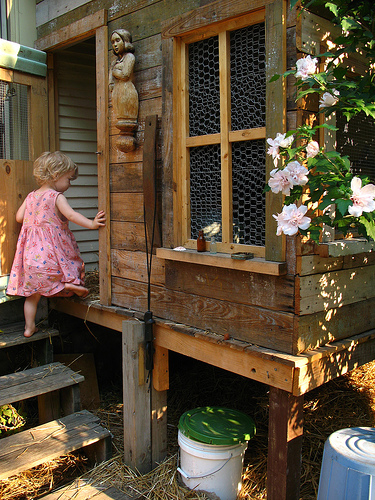

<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>
<start> A girl going into a wooden building . <end>
<start> A little girl climbing into a wooden playhouse . <end>
<start> A little girl climbing the stairs to her playhouse . <end>
<start> A little girl in a pink dress going into a wooden cabin . <end>


In [10]:
k=0
z=Image.open(path_img+img_name[k])
display(z)
try:
    for i in range(5):
        print(info[img_name[k]][i])
except :
    print("Error")
    pass

In [11]:
cap_list=[]
val=0
try:
    while True:
        for i in range(5):
            cap_list.append(info[img_name[val]][i])
        val+=1
except :
    print("Done")

Done


In [12]:
len(cap_list)

7500

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocab_size = 18000
embedding_dim = 16
trunc_type='post'
pad_type="post"
oov_tok = "<OOV>"
max_length=40

In [15]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(cap_list)

In [17]:
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

3896

In [18]:
lengths=[len(t.split()) for t in cap_list]

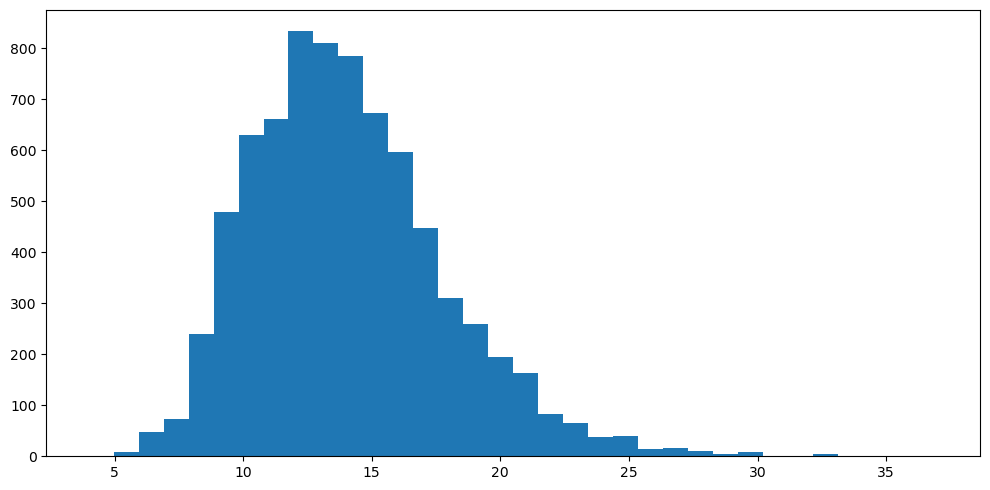

In [19]:
plt.figure(figsize=(10,5))
plt.hist(lengths,bins=len(set(lengths)))
plt.tight_layout()
plt.show()

In [20]:
def get_sequences(tokenizer,cap_list):
    sequences=tokenizer.texts_to_sequences(cap_list)
    #padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type,padding=pad_type)
    return sequences

In [21]:
val=0
padded_cap_seq=[]
try:
    while True:
        padded_cap_seq.append(get_sequences(tokenizer,info[img_name[val]]))
        val+=1
except:
    print("Done")

Done


In [22]:
info[img_name[0]]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [23]:
padded_cap_seq[0]

[[4, 2, 41, 5, 2, 80, 173, 8, 82, 44, 2, 464, 13, 509, 5, 29, 2227, 386, 3],
 [4, 2, 17, 349, 54, 2, 184, 162, 3],
 [4, 2, 33, 17, 82, 54, 2, 184, 1650, 3],
 [4, 2, 33, 17, 82, 6, 509, 19, 60, 1650, 3],
 [4, 2, 33, 17, 5, 2, 80, 173, 349, 54, 2, 184, 1651, 3]]

In [24]:
## Checking of reverse conversion
tokenizer.sequences_to_texts(padded_cap_seq[0])

['start a child in a pink dress is climbing up a set of stairs in an entry way end',
 'start a girl going into a wooden building end',
 'start a little girl climbing into a wooden playhouse end',
 'start a little girl climbing the stairs to her playhouse end',
 'start a little girl in a pink dress going into a wooden cabin end']

In [25]:
## convert the image data to array
def img_generator(img_path):
    
    img_arr=Image.open(img_path)
    img_arr=img_arr.resize((224,224))
    #img_arr=tf.keras.preprocessing.image.img_to_array(img_arr)/255
    return np.expand_dims(img_arr, axis=0)

img_generator(path_img+img_name[0]).shape
img_generator(path_img+img_name[0])

array([[[[ 81,  87,  96],
         [113, 130, 127],
         [119, 140, 133],
         ...,
         [  4,   2,   2],
         [  6,   6,   4],
         [  5,   7,   5]],

        [[ 78,  83,  91],
         [115, 132, 131],
         [123, 145, 139],
         ...,
         [  8,   8,   7],
         [  6,   9,   6],
         [ 13,  22,   6]],

        [[ 76,  77,  91],
         [119, 135, 138],
         [124, 148, 142],
         ...,
         [  8,   9,   5],
         [  7,  13,   6],
         [ 11,  25,   7]],

        ...,

        [[185, 106,  28],
         [140,  67,  22],
         [159, 110,  63],
         ...,
         [220, 228, 241],
         [162, 182, 210],
         [165, 184, 203]],

        [[174,  92,  17],
         [177, 133,  48],
         [228, 178,  77],
         ...,
         [217, 224, 240],
         [164, 181, 206],
         [168, 184, 200]],

        [[211, 129,  49],
         [212, 152,  67],
         [182, 114,  70],
         ...,
         [210, 217, 241],
        

In [26]:
len(img_name)

1500

In [27]:
info_seq={}
i=0
#j=0
try:
    while True:
        info_seq[img_name[i]]=padded_cap_seq[i]
        #print(i)
        i+=1
        #j+=1
except:
    print(f"error : {i}")

error : 1500


In [28]:
print(img_name[0])
padded_cap_seq[0]

1000268201_693b08cb0e.jpg


[[4, 2, 41, 5, 2, 80, 173, 8, 82, 44, 2, 464, 13, 509, 5, 29, 2227, 386, 3],
 [4, 2, 17, 349, 54, 2, 184, 162, 3],
 [4, 2, 33, 17, 82, 54, 2, 184, 1650, 3],
 [4, 2, 33, 17, 82, 6, 509, 19, 60, 1650, 3],
 [4, 2, 33, 17, 5, 2, 80, 173, 349, 54, 2, 184, 1651, 3]]

In [29]:
from tensorflow.keras.applications import InceptionV3
modele = InceptionV3(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
modele.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [30]:
nn_img={}
i=0
from tqdm import tqdm

try:
    for i in tqdm(range(len(img_name))):
        img_arr=img_generator(path_img+img_name[i])
        pred=modele.predict(img_arr).reshape(2048)
        nn_img[img_name[i]]=pred
        
        pass
except:
    print("Done")

  0%|          | 0/1500 [00:00<?, ?it/s]

1/1 [==============================] - 7s 7s/step


  0%|          | 1/1500 [00:11<4:52:04, 11.69s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 3/1500 [00:11<1:17:21,  3.10s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 5/1500 [00:12<38:40,  1.55s/it]  

1/1 [==============================] - 0s 27ms/step


  0%|          | 7/1500 [00:12<23:09,  1.07it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 9/1500 [00:12<15:13,  1.63it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 11/1500 [00:12<10:36,  2.34it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 13/1500 [00:12<07:49,  3.17it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 15/1500 [00:12<05:58,  4.14it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 17/1500 [00:13<04:46,  5.18it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 19/1500 [00:13<03:57,  6.23it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 21/1500 [00:13<03:28,  7.09it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 23/1500 [00:13<03:02,  8.10it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 25/1500 [00:13<02:43,  9.01it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 27/1500 [00:13<02:32,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 29/1500 [00:14<02:20, 10.47it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 31/1500 [00:14<02:18, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 33/1500 [00:14<02:14, 10.88it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 35/1500 [00:14<02:11, 11.13it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 37/1500 [00:14<02:07, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 39/1500 [00:14<02:06, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 41/1500 [00:15<02:07, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 43/1500 [00:15<02:03, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 45/1500 [00:15<02:03, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 47/1500 [00:15<02:02, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 49/1500 [00:15<02:03, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 51/1500 [00:15<02:03, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 53/1500 [00:16<02:04, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 55/1500 [00:16<02:04, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 57/1500 [00:16<02:05, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 59/1500 [00:16<02:06, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 61/1500 [00:16<02:05, 11.48it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 63/1500 [00:17<02:03, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 65/1500 [00:17<02:02, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 67/1500 [00:17<02:05, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 69/1500 [00:17<02:03, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 71/1500 [00:17<02:01, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 73/1500 [00:17<02:02, 11.61it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 75/1500 [00:18<02:02, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 77/1500 [00:18<02:16, 10.43it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 79/1500 [00:18<02:11, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 81/1500 [00:18<02:09, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 83/1500 [00:18<02:05, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 85/1500 [00:19<02:06, 11.15it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 87/1500 [00:19<02:06, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 89/1500 [00:19<02:04, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 91/1500 [00:19<02:01, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 93/1500 [00:19<02:01, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 95/1500 [00:19<02:02, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 97/1500 [00:20<02:01, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 99/1500 [00:20<02:00, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 101/1500 [00:20<02:00, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 103/1500 [00:20<02:02, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 105/1500 [00:20<02:02, 11.36it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 107/1500 [00:20<02:08, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 109/1500 [00:21<02:04, 11.14it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 111/1500 [00:21<02:03, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 113/1500 [00:21<02:02, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 115/1500 [00:21<02:01, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 117/1500 [00:21<02:01, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 119/1500 [00:21<02:00, 11.47it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 121/1500 [00:22<02:01, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 123/1500 [00:22<02:01, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 125/1500 [00:22<02:00, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 127/1500 [00:22<02:01, 11.32it/s]

1/1 [==============================] - 0s 61ms/step


  9%|▊         | 129/1500 [00:22<02:08, 10.64it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 131/1500 [00:23<02:25,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 132/1500 [00:23<02:29,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 133/1500 [00:23<02:34,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 134/1500 [00:23<02:34,  8.85it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 135/1500 [00:23<02:33,  8.88it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 136/1500 [00:23<02:47,  8.16it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 137/1500 [00:23<02:42,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 138/1500 [00:24<02:45,  8.21it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 139/1500 [00:24<02:41,  8.43it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 141/1500 [00:24<02:19,  9.75it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 143/1500 [00:24<02:09, 10.45it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 145/1500 [00:24<02:04, 10.88it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 147/1500 [00:24<02:08, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 149/1500 [00:25<02:04, 10.89it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 151/1500 [00:25<02:01, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 153/1500 [00:25<01:56, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 155/1500 [00:25<01:53, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 157/1500 [00:25<01:55, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 159/1500 [00:25<01:56, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 161/1500 [00:26<01:56, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 163/1500 [00:26<01:59, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 165/1500 [00:26<01:59, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 167/1500 [00:26<02:00, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 169/1500 [00:26<01:57, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 171/1500 [00:26<01:55, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 173/1500 [00:27<01:55, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 175/1500 [00:27<01:57, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 177/1500 [00:27<01:55, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 179/1500 [00:27<01:54, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 181/1500 [00:27<01:54, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 183/1500 [00:27<01:54, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 185/1500 [00:28<01:53, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 187/1500 [00:28<01:53, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 189/1500 [00:28<01:52, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 191/1500 [00:28<01:51, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 193/1500 [00:28<01:51, 11.75it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 195/1500 [00:29<01:51, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 197/1500 [00:29<01:49, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 199/1500 [00:29<01:48, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 201/1500 [00:29<01:50, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 203/1500 [00:29<01:51, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 205/1500 [00:29<01:50, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 207/1500 [00:30<01:50, 11.72it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 209/1500 [00:30<01:50, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 211/1500 [00:30<01:52, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 213/1500 [00:30<01:52, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 215/1500 [00:30<01:51, 11.48it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 217/1500 [00:30<02:06, 10.16it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 219/1500 [00:31<02:02, 10.42it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 221/1500 [00:31<02:00, 10.65it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 223/1500 [00:31<01:57, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 225/1500 [00:31<01:55, 11.07it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 227/1500 [00:31<01:54, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 229/1500 [00:32<01:55, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 231/1500 [00:32<01:54, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 233/1500 [00:32<01:53, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 235/1500 [00:32<01:51, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 237/1500 [00:32<01:51, 11.30it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 239/1500 [00:32<01:50, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 241/1500 [00:33<01:46, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 243/1500 [00:33<01:46, 11.76it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▋        | 245/1500 [00:33<01:49, 11.43it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 247/1500 [00:33<01:51, 11.26it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 249/1500 [00:33<01:51, 11.22it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 251/1500 [00:33<01:50, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 253/1500 [00:34<01:47, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 255/1500 [00:34<01:50, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 257/1500 [00:34<01:48, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 259/1500 [00:34<01:48, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 261/1500 [00:34<01:45, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 263/1500 [00:34<01:44, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 265/1500 [00:35<01:46, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 267/1500 [00:35<01:47, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 269/1500 [00:35<01:45, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 271/1500 [00:35<01:43, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 273/1500 [00:35<01:44, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 275/1500 [00:36<01:43, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 277/1500 [00:36<01:44, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 279/1500 [00:36<01:48, 11.26it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 281/1500 [00:36<01:45, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 283/1500 [00:36<01:44, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 285/1500 [00:36<01:44, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 287/1500 [00:37<01:42, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 289/1500 [00:37<01:43, 11.72it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 291/1500 [00:37<01:42, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 293/1500 [00:37<01:43, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 295/1500 [00:37<01:42, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 297/1500 [00:37<01:41, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 299/1500 [00:38<01:39, 12.06it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 301/1500 [00:38<01:41, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 303/1500 [00:38<01:42, 11.70it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 305/1500 [00:38<01:42, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 307/1500 [00:38<01:43, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 309/1500 [00:38<01:44, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 311/1500 [00:39<01:44, 11.36it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 313/1500 [00:39<01:43, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 315/1500 [00:39<01:43, 11.48it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 317/1500 [00:39<01:41, 11.62it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 319/1500 [00:39<01:42, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██▏       | 321/1500 [00:39<01:42, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 323/1500 [00:40<01:40, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 325/1500 [00:40<01:42, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 327/1500 [00:40<01:42, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 329/1500 [00:40<01:43, 11.36it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 331/1500 [00:40<01:44, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 333/1500 [00:41<01:48, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 335/1500 [00:41<01:46, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 337/1500 [00:41<01:46, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 339/1500 [00:41<01:41, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 341/1500 [00:41<01:39, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 343/1500 [00:41<01:39, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 345/1500 [00:42<01:38, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 347/1500 [00:42<01:38, 11.69it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 349/1500 [00:42<01:38, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 351/1500 [00:42<01:37, 11.75it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 353/1500 [00:42<01:37, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 355/1500 [00:42<01:37, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 357/1500 [00:43<01:38, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 359/1500 [00:43<01:36, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 361/1500 [00:43<01:36, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 363/1500 [00:43<01:36, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 365/1500 [00:43<01:35, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 367/1500 [00:43<01:34, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 369/1500 [00:44<01:35, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 371/1500 [00:44<01:35, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 373/1500 [00:44<01:37, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 375/1500 [00:44<01:37, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 377/1500 [00:44<01:38, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 379/1500 [00:45<01:37, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 381/1500 [00:45<01:38, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 383/1500 [00:45<01:35, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 385/1500 [00:45<01:34, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 387/1500 [00:45<01:32, 11.99it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 389/1500 [00:45<01:33, 11.90it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 391/1500 [00:46<01:35, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 393/1500 [00:46<01:35, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 395/1500 [00:46<01:35, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 397/1500 [00:46<01:33, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 399/1500 [00:46<01:35, 11.57it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 401/1500 [00:47<02:24,  7.60it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 403/1500 [00:47<02:10,  8.40it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 405/1500 [00:47<02:01,  9.01it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 407/1500 [00:47<01:52,  9.71it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 409/1500 [00:47<01:48, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 411/1500 [00:48<01:45, 10.32it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 413/1500 [00:48<01:42, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 415/1500 [00:48<01:38, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 417/1500 [00:48<01:37, 11.13it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 419/1500 [00:48<01:36, 11.15it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 421/1500 [00:48<01:36, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 423/1500 [00:49<01:33, 11.46it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 425/1500 [00:49<01:33, 11.55it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 427/1500 [00:49<01:34, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 429/1500 [00:49<01:33, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 431/1500 [00:49<01:33, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 433/1500 [00:50<01:32, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 435/1500 [00:50<01:31, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 437/1500 [00:50<01:32, 11.52it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 439/1500 [00:50<01:30, 11.71it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 441/1500 [00:50<01:30, 11.68it/s]

1/1 [==============================] - 0s 39ms/step


 30%|██▉       | 443/1500 [00:50<01:32, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 445/1500 [00:51<01:37, 10.87it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 447/1500 [00:51<01:34, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 449/1500 [00:51<01:34, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 451/1500 [00:51<01:35, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 453/1500 [00:51<01:33, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 455/1500 [00:51<01:32, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 457/1500 [00:52<01:32, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 459/1500 [00:52<01:32, 11.28it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 461/1500 [00:52<01:31, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 463/1500 [00:52<01:30, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 465/1500 [00:52<01:30, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 467/1500 [00:53<01:29, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 469/1500 [00:53<01:28, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 471/1500 [00:53<01:28, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 473/1500 [00:53<01:29, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 475/1500 [00:53<01:29, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 477/1500 [00:53<01:27, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 479/1500 [00:54<01:28, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 481/1500 [00:54<01:28, 11.57it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 483/1500 [00:54<01:29, 11.34it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 485/1500 [00:54<01:40, 10.05it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 487/1500 [00:54<01:44,  9.68it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 488/1500 [00:54<01:45,  9.63it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 489/1500 [00:55<01:46,  9.45it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 490/1500 [00:55<01:50,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 491/1500 [00:55<01:54,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 492/1500 [00:55<01:54,  8.78it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 493/1500 [00:55<01:55,  8.74it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 494/1500 [00:55<01:54,  8.78it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 496/1500 [00:55<01:41,  9.86it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 498/1500 [00:56<01:36, 10.37it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 500/1500 [00:56<01:33, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 502/1500 [00:56<01:30, 11.01it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 504/1500 [00:56<01:28, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 506/1500 [00:56<01:27, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 508/1500 [00:56<01:27, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 510/1500 [00:57<01:26, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 512/1500 [00:57<01:25, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 514/1500 [00:57<01:27, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 516/1500 [00:57<01:26, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 518/1500 [00:57<01:25, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 520/1500 [00:57<01:25, 11.47it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 522/1500 [00:58<01:23, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 524/1500 [00:58<01:22, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 526/1500 [00:58<01:23, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 528/1500 [00:58<01:24, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 530/1500 [00:58<01:24, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 532/1500 [00:58<01:24, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 534/1500 [00:59<01:23, 11.51it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 536/1500 [00:59<01:25, 11.28it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 538/1500 [00:59<01:22, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 540/1500 [00:59<01:20, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 542/1500 [00:59<01:20, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 544/1500 [00:59<01:21, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 546/1500 [01:00<01:20, 11.81it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 548/1500 [01:00<01:20, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 550/1500 [01:00<01:20, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 552/1500 [01:00<01:18, 12.10it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 554/1500 [01:00<01:31, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 556/1500 [01:01<01:32, 10.23it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 558/1500 [01:01<01:28, 10.61it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 560/1500 [01:01<01:27, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 562/1500 [01:01<01:26, 10.88it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 564/1500 [01:01<01:23, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 566/1500 [01:02<01:25, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 568/1500 [01:02<01:22, 11.30it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 570/1500 [01:02<01:20, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 572/1500 [01:02<01:19, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 574/1500 [01:02<01:18, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 576/1500 [01:02<01:17, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 578/1500 [01:02<01:15, 12.18it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 580/1500 [01:03<01:17, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 582/1500 [01:03<01:18, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 584/1500 [01:03<01:18, 11.69it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 586/1500 [01:03<01:17, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 588/1500 [01:03<01:16, 11.91it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 590/1500 [01:04<01:17, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 592/1500 [01:04<01:20, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 594/1500 [01:04<01:20, 11.20it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 596/1500 [01:04<01:19, 11.34it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 598/1500 [01:04<01:22, 10.94it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 600/1500 [01:04<01:25, 10.58it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 602/1500 [01:05<01:23, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 604/1500 [01:05<01:21, 10.98it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 606/1500 [01:05<01:21, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 608/1500 [01:05<01:20, 11.03it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 610/1500 [01:05<01:18, 11.32it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 612/1500 [01:06<01:20, 10.99it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 614/1500 [01:06<01:18, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 616/1500 [01:06<01:18, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 618/1500 [01:06<01:16, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 620/1500 [01:06<01:16, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 622/1500 [01:06<01:13, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 624/1500 [01:07<01:14, 11.73it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 626/1500 [01:07<01:14, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 628/1500 [01:07<01:15, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 630/1500 [01:07<01:15, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 632/1500 [01:07<01:15, 11.56it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 634/1500 [01:07<01:14, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 636/1500 [01:08<01:13, 11.69it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 638/1500 [01:08<01:13, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 640/1500 [01:08<01:13, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 642/1500 [01:08<01:13, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 644/1500 [01:08<01:14, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 646/1500 [01:08<01:14, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 648/1500 [01:09<01:13, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 650/1500 [01:09<01:13, 11.64it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 652/1500 [01:09<01:14, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 654/1500 [01:09<01:14, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▎     | 656/1500 [01:09<01:12, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 658/1500 [01:09<01:12, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 660/1500 [01:10<01:10, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 662/1500 [01:10<01:10, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 664/1500 [01:10<01:10, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 666/1500 [01:10<01:09, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 668/1500 [01:10<01:11, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 670/1500 [01:11<01:17, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 672/1500 [01:11<01:14, 11.18it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 674/1500 [01:11<01:14, 11.07it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 676/1500 [01:11<01:13, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 678/1500 [01:11<01:13, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 680/1500 [01:11<01:13, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 682/1500 [01:12<01:12, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 684/1500 [01:12<01:11, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 686/1500 [01:12<01:10, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 688/1500 [01:12<01:10, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 690/1500 [01:12<01:10, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 692/1500 [01:12<01:10, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 694/1500 [01:13<01:09, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 696/1500 [01:13<01:08, 11.75it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 698/1500 [01:13<01:10, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 700/1500 [01:13<01:10, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 702/1500 [01:13<01:10, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 704/1500 [01:14<01:08, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 706/1500 [01:14<01:09, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 708/1500 [01:14<01:09, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 710/1500 [01:14<01:08, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 712/1500 [01:14<01:08, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 714/1500 [01:14<01:07, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 716/1500 [01:15<01:08, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 718/1500 [01:15<01:07, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 720/1500 [01:15<01:07, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 722/1500 [01:15<01:06, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 724/1500 [01:15<01:06, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 726/1500 [01:15<01:05, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 728/1500 [01:16<01:03, 12.11it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 730/1500 [01:16<01:03, 12.13it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 732/1500 [01:16<01:02, 12.38it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 734/1500 [01:16<01:03, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 736/1500 [01:16<01:04, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 738/1500 [01:16<01:05, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 740/1500 [01:17<01:05, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 742/1500 [01:17<01:05, 11.51it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 744/1500 [01:17<01:05, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 746/1500 [01:17<01:04, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 748/1500 [01:17<01:03, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 750/1500 [01:17<01:03, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 752/1500 [01:18<01:04, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 754/1500 [01:18<01:03, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 756/1500 [01:18<01:03, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 758/1500 [01:18<01:04, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 760/1500 [01:18<01:04, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 762/1500 [01:18<01:04, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 764/1500 [01:19<01:03, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 766/1500 [01:19<01:03, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 768/1500 [01:19<01:03, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 770/1500 [01:19<01:03, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 772/1500 [01:19<01:02, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 774/1500 [01:20<01:02, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 776/1500 [01:20<01:02, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 778/1500 [01:20<01:03, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 780/1500 [01:20<01:02, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 782/1500 [01:20<01:02, 11.49it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 784/1500 [01:20<01:06, 10.79it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 786/1500 [01:21<01:05, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 788/1500 [01:21<01:03, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 790/1500 [01:21<01:02, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 792/1500 [01:21<01:02, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 794/1500 [01:21<01:00, 11.67it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 796/1500 [01:21<01:00, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 798/1500 [01:22<01:00, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 800/1500 [01:22<00:59, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 802/1500 [01:22<01:00, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 804/1500 [01:22<01:00, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 806/1500 [01:22<01:00, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 808/1500 [01:22<00:58, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 810/1500 [01:23<00:58, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 812/1500 [01:23<00:58, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 814/1500 [01:23<00:59, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 816/1500 [01:23<00:59, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 818/1500 [01:23<00:58, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 820/1500 [01:24<00:57, 11.79it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 822/1500 [01:24<00:57, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 824/1500 [01:24<00:57, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 826/1500 [01:24<00:56, 11.86it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 828/1500 [01:24<00:56, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 830/1500 [01:24<00:56, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 832/1500 [01:25<00:57, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 834/1500 [01:25<00:56, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 836/1500 [01:25<00:56, 11.82it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 838/1500 [01:25<00:56, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 840/1500 [01:25<00:56, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 842/1500 [01:25<00:56, 11.60it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 844/1500 [01:26<01:05, 10.08it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▋    | 846/1500 [01:26<01:10,  9.30it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 847/1500 [01:26<01:11,  9.15it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 848/1500 [01:26<01:12,  8.94it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 849/1500 [01:26<01:19,  8.24it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 850/1500 [01:26<01:18,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 851/1500 [01:27<01:17,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 852/1500 [01:27<01:16,  8.42it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 853/1500 [01:27<01:17,  8.36it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 855/1500 [01:27<01:08,  9.48it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 857/1500 [01:27<01:03, 10.14it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 859/1500 [01:27<01:00, 10.53it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 861/1500 [01:27<00:58, 10.98it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 863/1500 [01:28<00:56, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 865/1500 [01:28<00:54, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 867/1500 [01:28<00:54, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 869/1500 [01:28<00:53, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 871/1500 [01:28<00:52, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 873/1500 [01:28<00:52, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 875/1500 [01:29<00:52, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 877/1500 [01:29<00:53, 11.62it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 879/1500 [01:29<00:52, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 881/1500 [01:29<00:52, 11.69it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 883/1500 [01:29<00:51, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 885/1500 [01:29<00:51, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 887/1500 [01:30<00:52, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 889/1500 [01:30<00:52, 11.73it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 891/1500 [01:30<00:51, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 893/1500 [01:30<00:51, 11.90it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 895/1500 [01:30<00:53, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 897/1500 [01:31<00:54, 11.00it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 899/1500 [01:31<00:52, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 901/1500 [01:31<00:53, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 903/1500 [01:31<00:53, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 905/1500 [01:31<00:53, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 907/1500 [01:31<00:52, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 909/1500 [01:32<00:50, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 911/1500 [01:32<00:50, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 913/1500 [01:32<00:51, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 915/1500 [01:32<00:50, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 917/1500 [01:32<00:50, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 919/1500 [01:32<00:49, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 921/1500 [01:33<00:49, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 923/1500 [01:33<00:50, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 925/1500 [01:33<00:49, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 927/1500 [01:33<00:49, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 929/1500 [01:33<00:48, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 931/1500 [01:33<00:48, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 933/1500 [01:34<00:49, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 935/1500 [01:34<00:48, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 937/1500 [01:34<00:48, 11.73it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 939/1500 [01:34<00:49, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 941/1500 [01:34<00:51, 10.84it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 943/1500 [01:35<00:50, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 945/1500 [01:35<00:49, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 947/1500 [01:35<00:47, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 949/1500 [01:35<00:47, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 951/1500 [01:35<00:46, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 953/1500 [01:35<00:46, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 955/1500 [01:36<00:46, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 957/1500 [01:36<00:45, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 959/1500 [01:36<00:45, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 961/1500 [01:36<00:45, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 963/1500 [01:36<00:44, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 965/1500 [01:36<00:44, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 967/1500 [01:37<00:45, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 969/1500 [01:37<00:45, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 971/1500 [01:37<00:45, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 973/1500 [01:37<00:44, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 975/1500 [01:37<00:44, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 977/1500 [01:37<00:45, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 979/1500 [01:38<00:44, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 981/1500 [01:38<00:44, 11.70it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 983/1500 [01:38<00:44, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 985/1500 [01:38<00:44, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 987/1500 [01:38<00:44, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 989/1500 [01:38<00:43, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 991/1500 [01:39<00:42, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 993/1500 [01:39<00:42, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 995/1500 [01:39<00:43, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 997/1500 [01:39<00:44, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 999/1500 [01:39<00:43, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1001/1500 [01:39<00:42, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 1003/1500 [01:40<00:42, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1005/1500 [01:40<00:41, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1007/1500 [01:40<00:40, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1009/1500 [01:40<00:41, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 1011/1500 [01:40<00:41, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 1013/1500 [01:41<00:45, 10.75it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1015/1500 [01:41<00:43, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 1017/1500 [01:41<00:43, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1019/1500 [01:41<00:42, 11.22it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 1021/1500 [01:41<00:43, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1023/1500 [01:41<00:42, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1025/1500 [01:42<00:41, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 1027/1500 [01:42<00:40, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 1029/1500 [01:42<00:40, 11.73it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 1031/1500 [01:42<00:40, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 1033/1500 [01:42<00:40, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 1035/1500 [01:42<00:39, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 1037/1500 [01:43<00:39, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 1039/1500 [01:43<00:40, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 1041/1500 [01:43<00:39, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 1043/1500 [01:43<00:39, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 1045/1500 [01:43<00:39, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 1047/1500 [01:43<00:38, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 1049/1500 [01:44<00:38, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 1051/1500 [01:44<00:38, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 1053/1500 [01:44<00:37, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 1055/1500 [01:44<00:37, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 1057/1500 [01:44<00:38, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 1059/1500 [01:45<00:38, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 1061/1500 [01:45<00:37, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 1063/1500 [01:45<00:37, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 1065/1500 [01:45<00:36, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 1067/1500 [01:45<00:37, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 1069/1500 [01:45<00:36, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 1071/1500 [01:46<00:36, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 1073/1500 [01:46<00:36, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 1075/1500 [01:46<00:36, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 1077/1500 [01:46<00:36, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 1079/1500 [01:46<00:36, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 1081/1500 [01:46<00:35, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 1083/1500 [01:47<00:34, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 1085/1500 [01:47<00:35, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 1087/1500 [01:47<00:35, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1089/1500 [01:47<00:35, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1091/1500 [01:47<00:35, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 1093/1500 [01:47<00:35, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1095/1500 [01:48<00:35, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1097/1500 [01:48<00:34, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1099/1500 [01:48<00:34, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1101/1500 [01:48<00:34, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 1103/1500 [01:48<00:34, 11.53it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 1105/1500 [01:48<00:34, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 1107/1500 [01:49<00:33, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 1109/1500 [01:49<00:33, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 1111/1500 [01:49<00:33, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 1113/1500 [01:49<00:33, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 1115/1500 [01:49<00:32, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 1117/1500 [01:49<00:32, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 1119/1500 [01:50<00:32, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 1121/1500 [01:50<00:32, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 1123/1500 [01:50<00:31, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 1125/1500 [01:50<00:31, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 1127/1500 [01:50<00:31, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 1129/1500 [01:51<00:34, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 1131/1500 [01:51<00:32, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1133/1500 [01:51<00:31, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1135/1500 [01:51<00:31, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 1137/1500 [01:51<00:31, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 1139/1500 [01:51<00:31, 11.58it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1141/1500 [01:52<00:30, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 1143/1500 [01:52<00:30, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 1145/1500 [01:52<00:30, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 1147/1500 [01:52<00:30, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 1149/1500 [01:52<00:30, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 1151/1500 [01:52<00:29, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 1153/1500 [01:53<00:29, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 1155/1500 [01:53<00:29, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 1157/1500 [01:53<00:29, 11.53it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 1159/1500 [01:53<00:29, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 1161/1500 [01:53<00:28, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1163/1500 [01:53<00:28, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1165/1500 [01:54<00:28, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1167/1500 [01:54<00:28, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1169/1500 [01:54<00:28, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1171/1500 [01:54<00:27, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1173/1500 [01:54<00:27, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1175/1500 [01:54<00:27, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1177/1500 [01:55<00:27, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 1179/1500 [01:55<00:27, 11.84it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 1181/1500 [01:55<00:26, 11.91it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 1183/1500 [01:55<00:27, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1185/1500 [01:55<00:26, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 1187/1500 [01:55<00:26, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1189/1500 [01:56<00:26, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1191/1500 [01:56<00:26, 11.76it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 1193/1500 [01:56<00:26, 11.52it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 1195/1500 [01:56<00:26, 11.48it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 1197/1500 [01:56<00:26, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 1199/1500 [01:57<00:26, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 1201/1500 [01:57<00:26, 11.19it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 1203/1500 [01:57<00:26, 11.29it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 1205/1500 [01:57<00:28, 10.31it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████  | 1207/1500 [01:57<00:32,  9.12it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 1208/1500 [01:58<00:34,  8.46it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 1209/1500 [01:58<00:34,  8.45it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 1210/1500 [01:58<00:34,  8.30it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 1211/1500 [01:58<00:34,  8.45it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 1212/1500 [01:58<00:33,  8.50it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 1213/1500 [01:58<00:33,  8.47it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 1214/1500 [01:58<00:33,  8.55it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 1215/1500 [01:58<00:32,  8.90it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 1217/1500 [01:59<00:28,  9.92it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 1219/1500 [01:59<00:27, 10.33it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 1221/1500 [01:59<00:25, 10.97it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 1223/1500 [01:59<00:24, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 1225/1500 [01:59<00:24, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 1227/1500 [01:59<00:23, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 1229/1500 [02:00<00:22, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 1231/1500 [02:00<00:22, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 1233/1500 [02:00<00:22, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 1235/1500 [02:00<00:22, 11.76it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 1237/1500 [02:00<00:23, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 1239/1500 [02:01<00:25, 10.12it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1241/1500 [02:01<00:24, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1243/1500 [02:01<00:23, 10.96it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1245/1500 [02:01<00:22, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1247/1500 [02:01<00:22, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 1249/1500 [02:01<00:22, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1251/1500 [02:02<00:21, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 1253/1500 [02:02<00:21, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 1255/1500 [02:02<00:21, 11.27it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 1257/1500 [02:02<00:20, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 1259/1500 [02:02<00:20, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 1261/1500 [02:02<00:20, 11.85it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 1263/1500 [02:03<00:19, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 1265/1500 [02:03<00:20, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 1267/1500 [02:03<00:20, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 1269/1500 [02:03<00:20, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 1271/1500 [02:03<00:19, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 1273/1500 [02:03<00:19, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 1275/1500 [02:04<00:19, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 1277/1500 [02:04<00:19, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 1279/1500 [02:04<00:19, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 1281/1500 [02:04<00:18, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 1283/1500 [02:04<00:18, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 1285/1500 [02:04<00:18, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 1287/1500 [02:05<00:18, 11.69it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 1289/1500 [02:05<00:18, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 1291/1500 [02:05<00:18, 11.29it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 1293/1500 [02:05<00:18, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 1295/1500 [02:05<00:17, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 1297/1500 [02:05<00:17, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1299/1500 [02:06<00:17, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1301/1500 [02:06<00:17, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1303/1500 [02:06<00:17, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1305/1500 [02:06<00:16, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1307/1500 [02:06<00:16, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1309/1500 [02:07<00:16, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 1311/1500 [02:07<00:16, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1313/1500 [02:07<00:15, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1315/1500 [02:07<00:15, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1317/1500 [02:07<00:15, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1319/1500 [02:07<00:16, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1321/1500 [02:08<00:15, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 1323/1500 [02:08<00:15, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 1325/1500 [02:08<00:14, 11.75it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 1327/1500 [02:08<00:14, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 1329/1500 [02:08<00:14, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 1331/1500 [02:08<00:14, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 1333/1500 [02:09<00:13, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 1335/1500 [02:09<00:13, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 1337/1500 [02:09<00:13, 11.87it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 1339/1500 [02:09<00:13, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 1341/1500 [02:09<00:13, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 1343/1500 [02:09<00:12, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 1345/1500 [02:10<00:12, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 1347/1500 [02:10<00:12, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 1349/1500 [02:10<00:12, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1351/1500 [02:10<00:12, 12.40it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 1353/1500 [02:10<00:12, 11.99it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 1355/1500 [02:10<00:13, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 1357/1500 [02:11<00:12, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 1359/1500 [02:11<00:12, 11.34it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 1361/1500 [02:11<00:12, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 1363/1500 [02:11<00:11, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 1365/1500 [02:11<00:11, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 1367/1500 [02:11<00:11, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 1369/1500 [02:12<00:10, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 1371/1500 [02:12<00:10, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 1373/1500 [02:12<00:10, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 1375/1500 [02:12<00:10, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 1377/1500 [02:12<00:10, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 1379/1500 [02:12<00:10, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 1381/1500 [02:13<00:10, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 1383/1500 [02:13<00:10, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 1385/1500 [02:13<00:09, 11.76it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 1387/1500 [02:13<00:10, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1389/1500 [02:13<00:09, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1391/1500 [02:14<00:09, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1393/1500 [02:14<00:09, 11.52it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1395/1500 [02:14<00:08, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1397/1500 [02:14<00:08, 11.85it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 1399/1500 [02:14<00:08, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1401/1500 [02:14<00:08, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 1403/1500 [02:15<00:08, 11.86it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 1405/1500 [02:15<00:07, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 1407/1500 [02:15<00:07, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 1409/1500 [02:15<00:07, 11.43it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 1411/1500 [02:15<00:08, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 1413/1500 [02:15<00:07, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 1415/1500 [02:16<00:07, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 1417/1500 [02:16<00:07, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 1419/1500 [02:16<00:07, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 1421/1500 [02:16<00:06, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 1423/1500 [02:16<00:06, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 1425/1500 [02:16<00:06, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 1427/1500 [02:17<00:06, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 1429/1500 [02:17<00:06, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 1431/1500 [02:17<00:05, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 1433/1500 [02:17<00:05, 11.70it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1435/1500 [02:17<00:05, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 1437/1500 [02:17<00:05, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 1439/1500 [02:18<00:05, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 1441/1500 [02:18<00:04, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 1443/1500 [02:18<00:04, 12.31it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 1445/1500 [02:18<00:04, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 1447/1500 [02:18<00:04, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1449/1500 [02:19<00:04, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1451/1500 [02:19<00:04, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1453/1500 [02:19<00:04, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1455/1500 [02:19<00:03, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1457/1500 [02:19<00:03, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1459/1500 [02:19<00:03, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 1461/1500 [02:20<00:03, 11.75it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1463/1500 [02:20<00:03, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1465/1500 [02:20<00:03, 11.58it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1467/1500 [02:20<00:02, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1469/1500 [02:20<00:02, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1471/1500 [02:20<00:02, 10.30it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 1473/1500 [02:21<00:02, 10.63it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 1475/1500 [02:21<00:02, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1477/1500 [02:21<00:02, 11.44it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 1479/1500 [02:21<00:01, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 1481/1500 [02:21<00:01, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1483/1500 [02:21<00:01, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1485/1500 [02:22<00:01, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 1487/1500 [02:22<00:01, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1489/1500 [02:22<00:00, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1491/1500 [02:22<00:00, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 1493/1500 [02:22<00:00, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 1495/1500 [02:23<00:00, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 1497/1500 [02:23<00:00, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 1499/1500 [02:23<00:00, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


100%|██████████| 1500/1500 [02:23<00:00, 10.46it/s]


In [31]:
import pickle

In [32]:
with open("process_img.p","wb") as pickle_f:
    pickle.dump(nn_img, pickle_f)

In [33]:
## Opening the predicted file
with open("./process_img.p","rb") as f:
    nn_img=pickle.load(f,encoding="bytes")

In [34]:
nn_img

{'1000268201_693b08cb0e.jpg': array([11.409002 ,  0.       ,  2.6761968, ...,  0.       ,  1.6057236,
         1.2118689], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([1.6505638 , 4.2598467 , 5.3414736 , ..., 0.        , 0.29904756,
        0.        ], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([10.970586 ,  6.4916844,  9.069624 , ...,  0.       ,  0.       ,
        15.738352 ], dtype=float32),
 '1003163366_44323f5815.jpg': array([8.868919  , 1.1552356 , 2.8754547 , ..., 1.6283854 , 0.46225932,
        1.6508026 ], dtype=float32),
 '1007129816_e794419615.jpg': array([10.714626  ,  2.6096365 ,  0.        , ...,  7.4889154 ,
         0.08187137, 16.956055  ], dtype=float32),
 '1007320043_627395c3d8.jpg': array([ 4.0046325,  0.0884423, 27.579185 , ...,  0.       ,  0.       ,
         0.       ], dtype=float32),
 '1009434119_febe49276a.jpg': array([10.461798  ,  2.8515332 ,  2.5645847 , ...,  2.8819273 ,
         0.02496718,  0.        ], dtype=float32),
 '1012212859_01

In [35]:
len(nn_img)

1500

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
info_seq[img_name[0]]

[[4, 2, 41, 5, 2, 80, 173, 8, 82, 44, 2, 464, 13, 509, 5, 29, 2227, 386, 3],
 [4, 2, 17, 349, 54, 2, 184, 162, 3],
 [4, 2, 33, 17, 82, 54, 2, 184, 1650, 3],
 [4, 2, 33, 17, 82, 6, 509, 19, 60, 1650, 3],
 [4, 2, 33, 17, 5, 2, 80, 173, 349, 54, 2, 184, 1651, 3]]

In [38]:
nn_img[img_name[0]]

array([11.409002 ,  0.       ,  2.6761968, ...,  0.       ,  1.6057236,
        1.2118689], dtype=float32)

In [39]:
## input is photo dic (nn_img[]), caption - seq (info_seq[])dict already defined
## img is the index value

def generator(photo,caption):
    X=[]
    y_in=[]
    y_out=[]
    # loop 1: for appending the images
    for k,vv in caption.items():
        # loop 2: For the 5 different captions in a single image
        for v in vv:
            # loop3 : For a single caption out the 5 
            for i in range(1,len(v)):
                # appending the image to X
                X.append(photo[k])
                # taking the first part of the sequence
                in_seq=[v[:i]]
                # the park of sequence the model should predict next
                out_seq=v[i]
                # Now making the array even for processing by padding
                
                in_seq=pad_sequences(in_seq,maxlen=max_length,padding=pad_type,truncating=trunc_type)[0]
                # As the y_test is going to be 1 in length to_categrcal converts it to vocab size
                out_seq=to_categorical([out_seq],num_classes=vocab_size+1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
    
    return X,y_in,y_out

In [40]:
X,y_in,y_out=generator(nn_img,info_seq)

In [41]:
len(X),len(y_in),len(y_out)

(89582, 89582, 89582)

In [42]:
X=np.array(X)
y_in=np.array(y_in,dtype="float64")
y_out=np.array(y_out,dtype="float64")

In [43]:
X.shape,y_in.shape,y_out.shape

((89582, 2048), (89582, 40), (89582, 3897))

In [44]:
embedding_size=128
image_model=tf.keras.Sequential()
image_model.add(Dense(embedding_size,input_shape=(2048,),activation="relu"))
image_model.add(RepeatVector(max_length))

image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 40, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [46]:
language_model=tf.keras.Sequential()
language_model.add(Embedding(input_dim=vocab_size,output_dim=embedding_size,input_length=max_length))
language_model.add(LSTM(256,return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           498688    
                                                                 
 lstm_1 (LSTM)               (None, 40, 256)           394240    
                                                                 
 time_distributed_1 (TimeDis  (None, 40, 128)          32896     
 tributed)                                                       
                                                                 
Total params: 925,824
Trainable params: 925,824
Non-trainable params: 0
_________________________________________________________________


In [47]:
conca=Concatenate()([image_model.output,language_model.output])
x=LSTM(128,return_sequences=True)(conca)
x=LSTM(512,return_sequences=False)(x)
x=Dense(vocab_size+1)(x)
out=Activation('Softmax')(x)

model=tf.keras.Model(inputs=[image_model.input,language_model.input],outputs=out)
model.compile(loss="categorical_crossentropy",optimizer='RMSprop',metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_1_input (InputLayer)  [(None, 40)]        0           []                               
                                                                                                  
 dense_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 40, 128)      498688      ['embedding_1_input[0][0]']      
                                                                                                  
 dense (Dense)                  (None, 128)          262272      ['dense_input[0][0]']            
                                                                                              

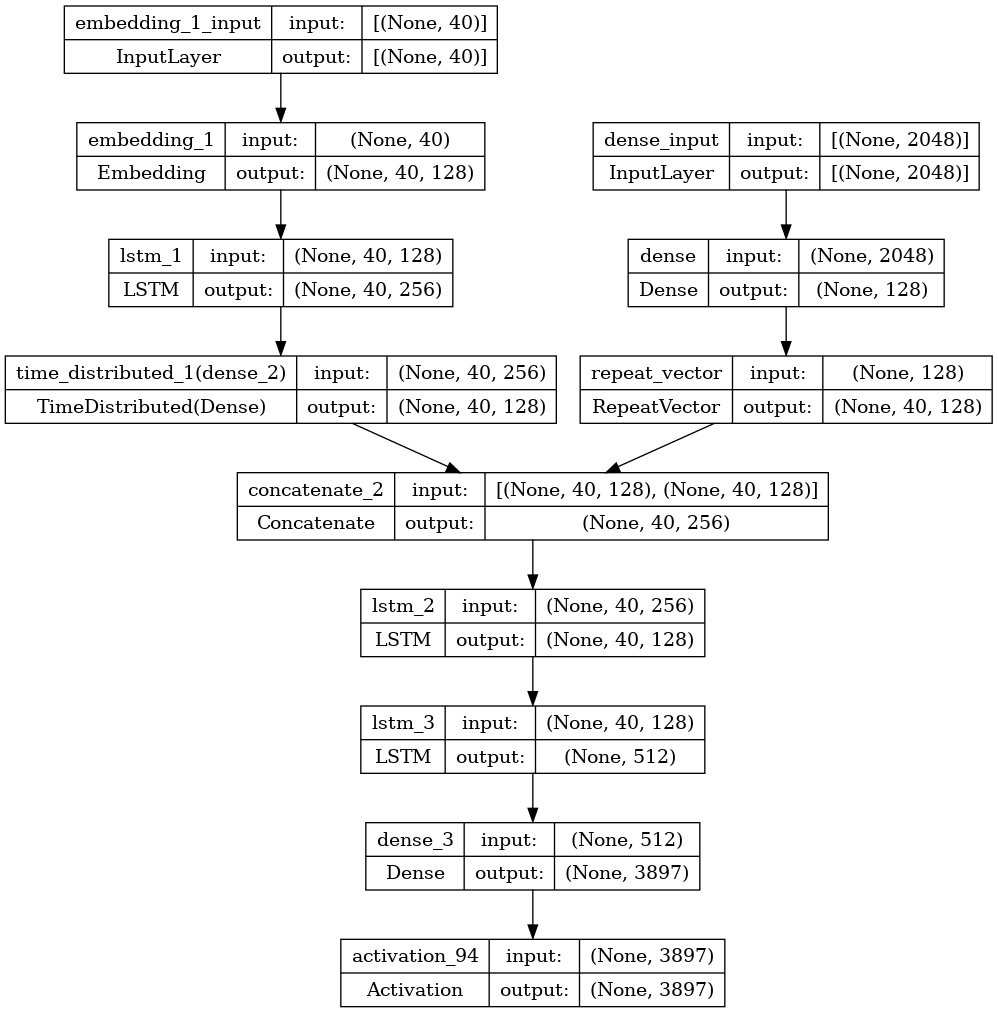

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="./model_plot.png",show_shapes=True,show_layer_names=True)

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model_acc.h5', monitor = 'accuracy' , mode = 'max', verbose = 1 , save_best_only = True)

In [50]:
model.fit([X,y_in],y_out,batch_size=512,epochs=70,callbacks=[mc])

Epoch 1/70
175/175 [==============================] - ETA: 0s - loss: 5.4336 - accuracy: 0.1282
Epoch 1: accuracy improved from -inf to 0.12820, saving model to best_model_acc.h5
175/175 [==============================] - 29s 123ms/step - loss: 5.4336 - accuracy: 0.1282
Epoch 2/70
175/175 [==============================] - ETA: 0s - loss: 5.3312 - accuracy: 0.1322
Epoch 2: accuracy improved from 0.12820 to 0.13217, saving model to best_model_acc.h5
175/175 [==============================] - 15s 88ms/step - loss: 5.3312 - accuracy: 0.1322
Epoch 3/70
175/175 [==============================] - ETA: 0s - loss: 5.3122 - accuracy: 0.1328
Epoch 3: accuracy improved from 0.13217 to 0.13277, saving model to best_model_acc.h5
175/175 [==============================] - 14s 81ms/step - loss: 5.3122 - accuracy: 0.1328
Epoch 4/70
175/175 [==============================] - ETA: 0s - loss: 5.2925 - accuracy: 0.1331
Epoch 4: accuracy improved from 0.13277 to 0.13312, saving model to best_model_acc.h5
1

In [51]:
def getImage(file_path):
    test_img=Image.open(file_path)
    test_img=test_img.resize((224,224))
    #test_img=tf.keras.preprocessing.image.img_to_array(test_img)/255
    test_img=np.expand_dims(test_img,axis=0)
    return test_img

In [52]:
test_feature=modele.predict(getImage(path_img+img_name[0]))

1/1 [==============================] - 0s 27ms/step


In [53]:
test_feature

array([[11.409002 ,  0.       ,  2.6761968, ...,  0.       ,  1.6057236,
         1.2118689]], dtype=float32)

In [54]:
text_inp=["start"]
count=0
caption=" "
while count<25:
    count+=1
    encoded=[]
    for i in text_inp:
        encoded.append(tokenizer.word_docs[i])
    encoded=[encoded]
    encoded=pad_sequences(encoded,padding=pad_type,truncating=trunc_type,maxlen=max_length)
    
    prediction=np.argmax(model.predict([test_feature,encoded]))
    
    sampled_word=tokenizer.index_word[prediction]
    caption=caption+" "+ sampled_word
    if sampled_word=="end":
        break
    text_inp.append(sampled_word)

1/1 [==============================] - 0s 22ms/step


In [55]:
" ".join(text_inp[1:])

'a a a a a a a a a a a a a a a a a a a a a a a a a'

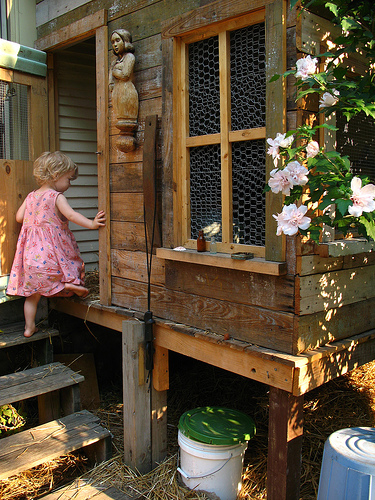

In [56]:
Image.open(path_img+img_name[0])